In [176]:
import pandas as pd
import matplotlib.pyplot as plt                      
import seaborn as sns
import numpy as np

In [177]:
# 한글 폰트 설정
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

In [178]:
# 데이터 로드
school_health=pd.read_csv('../../data/school_health.csv')

# 검정에 필요한 요소 구별
data=school_health[["아침식사","BMI","성별","학교급"]]
print("데이터 샘플")
print(data.head())

# 데이터 형태 파악
print(data.info())

# 5. 결측치 확인
print("\n결측치 확인:")
print(data.isnull().sum())

#데이터 결측치 제거
data=data[data['아침식사'].notna()]

# 데이터 통일
mapping = {1: 4, 2: 3, 3: 2, 4: 1}
data['아침식사'] = data['아침식사'].map(mapping)

데이터 샘플
   아침식사    BMI 성별 학교급
0   2.0  11.56  여   초
1   1.0  11.64  여   초
2   1.0  11.68  여   초
3   3.0  11.74  여   초
4   NaN  11.74  여   초
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92722 entries, 0 to 92721
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   아침식사    89366 non-null  float64
 1   BMI     92722 non-null  float64
 2   성별      92722 non-null  object 
 3   학교급     92722 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.8+ MB
None

결측치 확인:
아침식사    3356
BMI        0
성별         0
학교급        0
dtype: int64


In [179]:
# 사분위수를 통한 이상치 탐색 밑 제거
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1 

# 상한선과 하한선 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 탐색
outliers = data[(data['BMI'] < lower_bound) | (data['BMI'] > upper_bound)]

print(f"하한선: {lower_bound}, 상한선: {upper_bound}")

print(f"이상치 데이터 개수: {outliers.shape[0]}")

# 이상치 제거
data = data[(data['BMI'] >= lower_bound) & (data['BMI'] <= upper_bound)]

# 이상치 제거됬는지 확인
outliers = data[(data['BMI'] < lower_bound) | (data['BMI'] > upper_bound)]
print(f"이상치 데이터 개수: {outliers.shape[0]}")

하한선: 9.155000000000003, 상한선: 31.674999999999997
이상치 데이터 개수: 893
이상치 데이터 개수: 0


In [180]:
# 데이터 분포 비율을 확인
counts = data['아침식사'].value_counts()
print(counts)

# BMI의 기초통계량
print("\n BMI 기초통계량")
print(data['BMI'].describe())

# 아침식사 빈도 별 BMI 평균
bre_bmi = data.groupby('아침식사')['BMI'].mean()
print("\n아침식사 빈도 별 BMI 평균:")
print(bre_bmi)

아침식사
4    42034
3    19828
1    15645
2    10966
Name: count, dtype: int64

 BMI 기초통계량
count    88473.000000
mean        20.563482
std          3.969931
min         11.560000
25%         17.570000
50%         20.100000
75%         23.110000
max         31.670000
Name: BMI, dtype: float64

아침식사 빈도 별 BMI 평균:
아침식사
1    21.589680
2    21.111632
3    20.498873
4    20.069006
Name: BMI, dtype: float64


Text(0, 0.5, '학생 수')

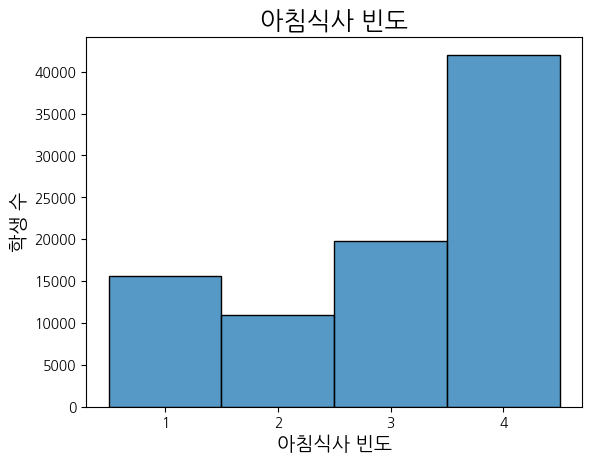

In [181]:
# 데이터 분포 그래프로 확인
sns.histplot(data=data, x='아침식사', discrete=True, kde=False)
plt.xticks([1, 2, 3, 4])
plt.title('아침식사 빈도', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)

Text(0, 0.5, '학생 수')

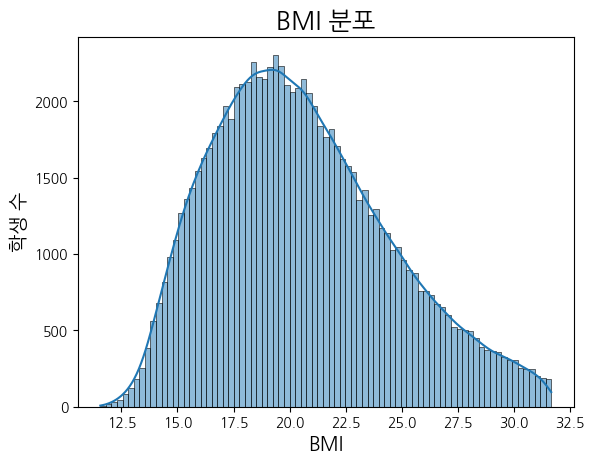

In [182]:
# BMI의 분포 파악
sns.histplot(data['BMI'], kde=True)
plt.title('BMI 분포', fontsize=18)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('학생 수', fontsize=14)

Text(0, 0.5, 'BMI')

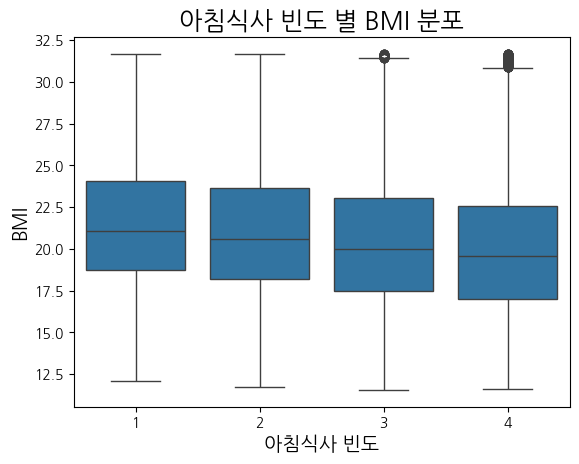

In [183]:
# 각 설문에 따른 BMI 분포 파악
sns.boxplot(data=data, x='아침식사', y='BMI')
plt.title('아침식사 빈도 별 BMI 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('BMI', fontsize=14)
# 아침식사 빈도 별 BMI 분포의 차이 확인


성별 분포:
성별
남    44838
여    43635
Name: count, dtype: int64

 아침식사 빈도 별 성별 분포:
아침식사  성별
1     여      8125
      남      7520
2     여      5674
      남      5292
3     여     10104
      남      9724
4     남     22302
      여     19732
Name: count, dtype: int64


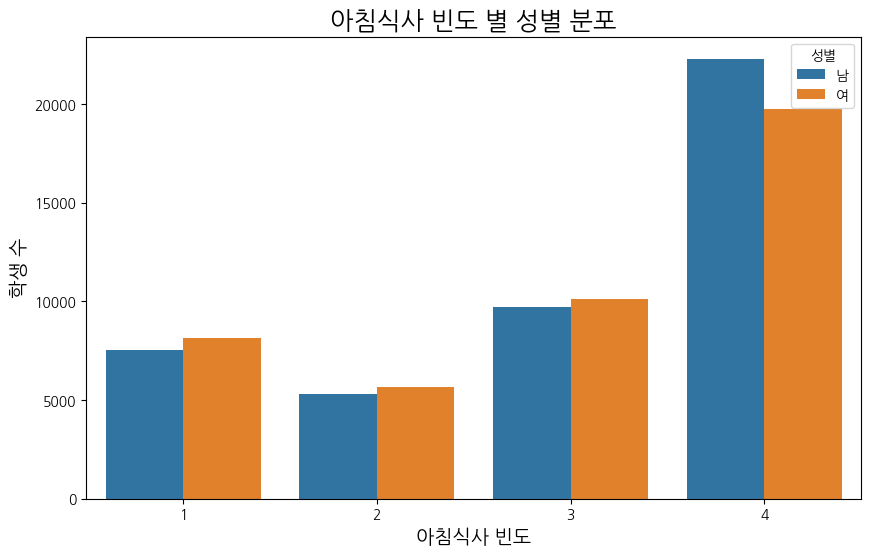

In [184]:
# 아침식사 빈도와 관련이 있을 요소 2가지 중 첫번째 - 성별
print("\n성별 분포:")
print(data['성별'].value_counts())

# 8. 아침식사 빈도 별 성별 분포 확인
print("\n 아침식사 빈도 별 성별 분포:")
breakfast_gender = data.groupby('아침식사')['성별'].value_counts()
print(breakfast_gender)

# 8-1. 아침식사 빈도 별 성별 비율 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='아침식사', hue='성별', data=data)
plt.title('아침식사 빈도 별 성별 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)
plt.legend(title='성별')
plt.show()

# 성별 간의 아침식사 빈도가 차이가 있는 것으로 보임

In [185]:
# 아침식사 하는 횟수와 성별의 독립성 확인 (카이제곱 검정)
contingency_table = pd.crosstab(data["아침식사"], data['성별'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("아침식사 빈도와 성별의 독립성 확인")
print(f"\n카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p}")
print(f"자유도: {dof}")
# 검사 결과 아침 식사 빈도와 성별은 독립적이라는 귀무가설 기각하고 유의미한 연관성 있다 판단 가능

아침식사 빈도와 성별의 독립성 확인

카이제곱 통계량: 184.7941
p-value: 8.129980663499473e-40
자유도: 3



학교급 분포:
학교급
초    36203
고    27021
중    25249
Name: count, dtype: int64

 아침식사 빈도 별 학교급 분포:
아침식사  학교급
1     고       7182
      중       5481
      초       2982
2     고       4053
      중       3524
      초       3389
3     초       8371
      고       5944
      중       5513
4     초      21461
      중      10731
      고       9842
Name: count, dtype: int64


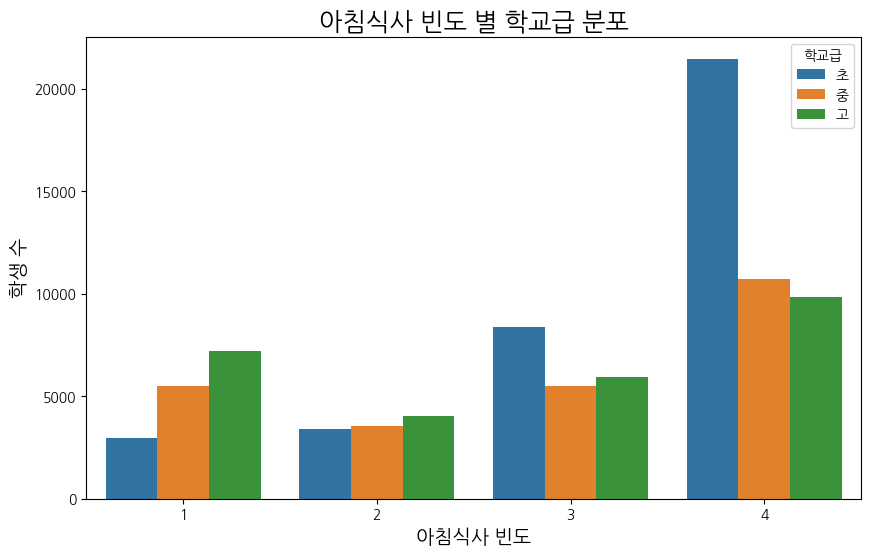

In [186]:
# 아침식사 빈도와 관련이 있을 요소 2가지 중 두번째 - 학교급
print("\n학교급 분포:")
print(data['학교급'].value_counts())

# 8. 아침식사 빈도 별 성별 분포 확인
print("\n 아침식사 빈도 별 학교급 분포:")
breakfast_gender = data.groupby('아침식사')['학교급'].value_counts()
print(breakfast_gender)

# 8-1. 아침식사 빈도 별 성별 비율 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='아침식사', hue='학교급',data=data)
plt.title('아침식사 빈도 별 학교급 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)
plt.legend(title='학교급')
plt.show()
# 결과 학교급마다 확실하게 차이가 있는 것으로 파악

In [187]:
# 아침식사 하는 횟수와 학교급의 독립성 확인
contingency_table = pd.crosstab(data["아침식사"], data['학교급'])
print("\n아침식사와 학교급의 교차표:")
print(contingency_table)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\n카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p}")
print(f"자유도: {dof}")
# 검사 결과 아침 식사 빈도와 학교급이 독립적이라는 귀무 가설을 기각하고  유의마한 연관성이 있다 판단 가능


아침식사와 학교급의 교차표:
학교급      고      중      초
아침식사                    
1     7182   5481   2982
2     4053   3524   3389
3     5944   5513   8371
4     9842  10731  21461

카이제곱 통계량: 5635.7851
p-value: 0.0
자유도: 6


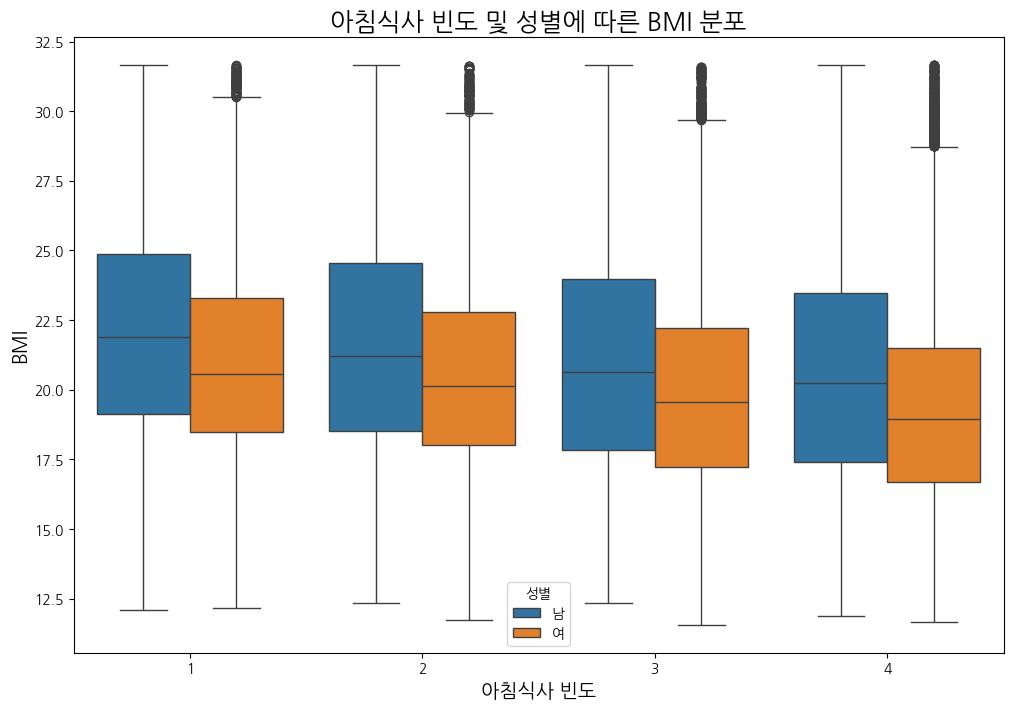

In [188]:
# 아침 식사 빈도와 성별에 따른 BMI 분포의 차이를 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x='아침식사', y='BMI', hue='성별', data=data)
plt.title('아침식사 빈도 및 성별에 따른 BMI 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='성별')
plt.show()
# 결과 아침 식사 빈도가 커질 수록 bmi가 감소하는 경향을 보임

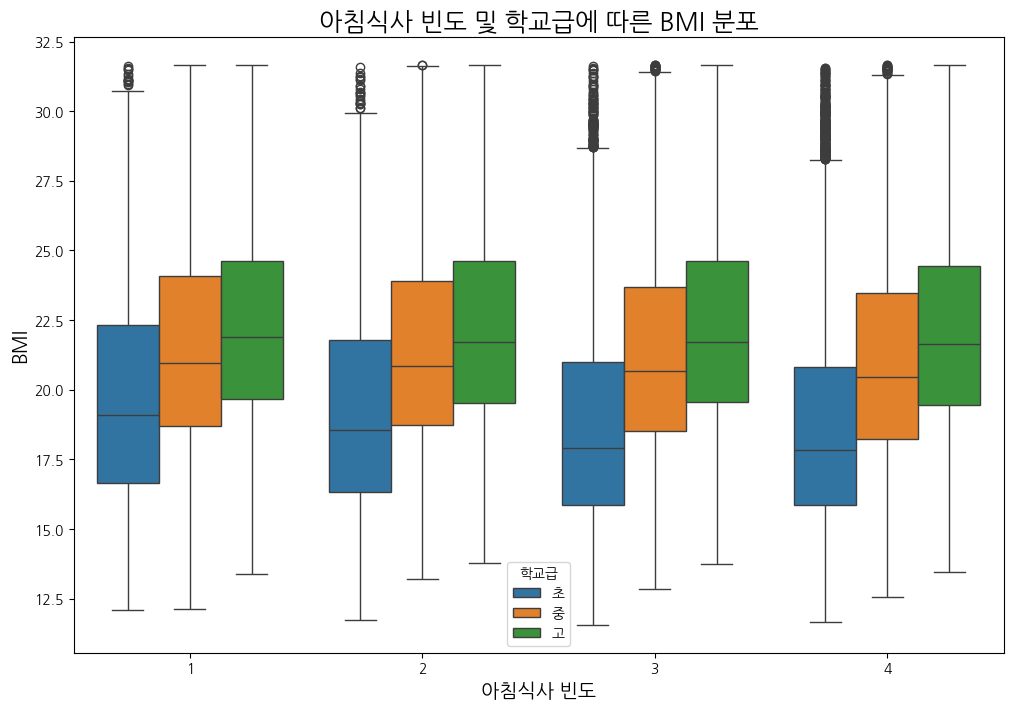

In [189]:
# 아침 식사 빈도와 학교급에 따른 BMI 분포의 차이를 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x='아침식사', y='BMI', hue='학교급', data=data)
plt.title('아침식사 빈도 및 학교급에 따른 BMI 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.legend(title='학교급')
plt.show()
# 결과 아침 식사 빈도가 커질 수록 bmi가 감소하는 경향을 보임

In [190]:
# 성별별 아침식사 빈도와 BMI 상관 계수 계산
print("\n성별별 아침식사 빈도와 BMI의 상관계수:")
for gender in data['성별'].unique():
    subset = data[data['성별'] == gender]
    corr = subset['아침식사'].corr(subset['BMI'])
    print(f"{gender} 학생의 상관계수: {corr:.4f}")
# 결과 성별 구분 없이 모두 음의 상관 계수를 가짐


성별별 아침식사 빈도와 BMI의 상관계수:
여 학생의 상관계수: -0.1762
남 학생의 상관계수: -0.1356


In [191]:
# 학교급별 아침식사 빈도와 BMI 상관 계수 계산
print("\n학교급별 아침식사 빈도와 BMI의 상관계수:")
for school in data['학교급'].unique():
    subset = data[data['학교급'] == school]
    corr = subset['아침식사'].corr(subset['BMI'])
    print(f"{school} 학생의 상관계수: {corr:.4f}")
    # 결과 성별 구분 없이 모두 음의 상관 계수를 가짐


학교급별 아침식사 빈도와 BMI의 상관계수:
초 학생의 상관계수: -0.0915
중 학생의 상관계수: -0.0566
고 학생의 상관계수: -0.0204


In [192]:
# 아침식사 빈도를 기준으로 4개의 분포로 구성
bmi_group1 = data[data['아침식사'] == 1]['BMI']
bmi_group2 = data[data['아침식사'] == 2]['BMI']
bmi_group3 = data[data['아침식사'] == 3]['BMI']
bmi_group4 = data[data['아침식사'] == 4]['BMI']

Text(0.5, 1.0, '아침식사를 거의 먹는 경우(6~7일) bmi qqplot')

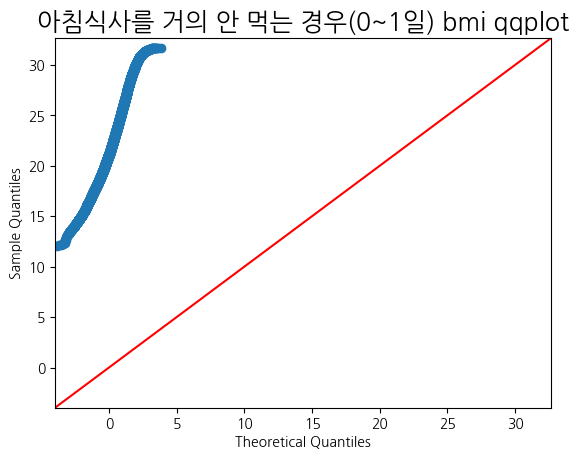

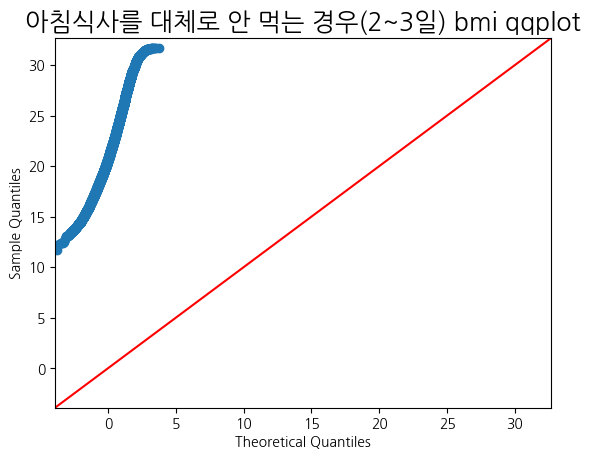

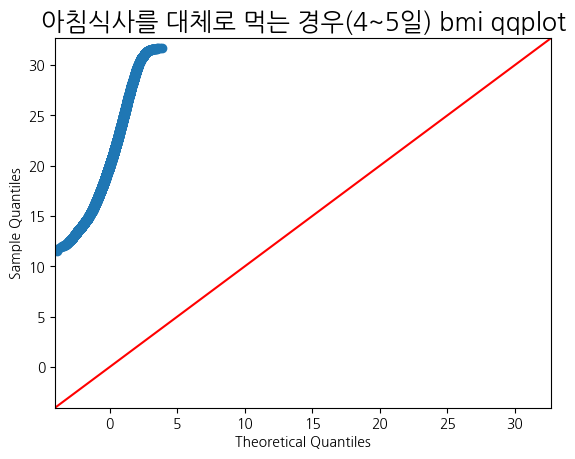

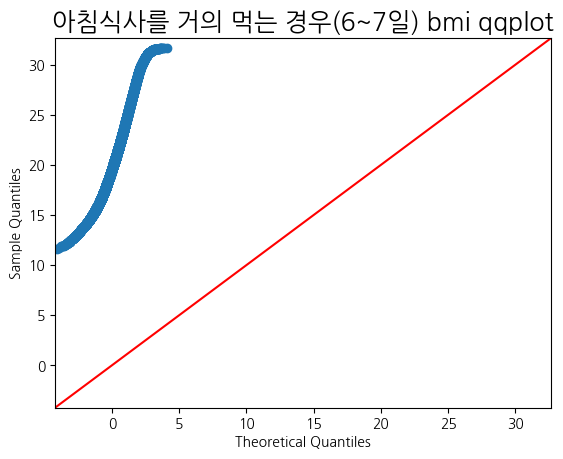

In [193]:
#BMI의 정규성을 QQ-PLOT으로 파악
import statsmodels.api as sm

sm.qqplot(bmi_group1, line='45')
plt.title("아침식사를 거의 안 먹는 경우(0~1일) bmi qqplot", fontsize=18)

sm.qqplot(bmi_group2, line='45')
plt.title("아침식사를 대체로 안 먹는 경우(2~3일) bmi qqplot", fontsize=18)

sm.qqplot(bmi_group3, line='45')
plt.title("아침식사를 대체로 먹는 경우(4~5일) bmi qqplot", fontsize=18)

sm.qqplot(bmi_group4, line='45')
plt.title("아침식사를 거의 먹는 경우(6~7일) bmi qqplot", fontsize=18)
# 결과 모든 그룹이 정규성을 띄지 않는 것으로 파악됨

In [194]:
# 4가지 그룹에 대한 정규성 검사 - shapiro test
# 아침식사를 거의 꼭 먹는 경우
from scipy.stats import shapiro
stat1, pvalue1 = shapiro(bmi_group1)
print(f"아침식사를 거의 안 먹는 경우 : Statistic = {stat1:.4f}, p-value = {pvalue1:.4f}")
if pvalue1 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 아침식사를 대체로 먹는 경우
stat2, pvalue2 = shapiro(bmi_group2)
print(f"아침식사를 대체로 안 먹는 경우 : Statistic = {stat2:.4f}, p-value = {pvalue2:.4f}")
if pvalue2 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 아침식사를 대체로 안 먹는 경우
stat3, pvalue3 = shapiro(bmi_group3)
print(f"아침식사를 대체로 먹는 경우 : Statistic = {stat3:.4f}, p-value = {pvalue3:.4f}")
if pvalue3 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 아침식사를 거의 안 먹는 경우
stat4, pvalue4 = shapiro(bmi_group4)
print(f"아침식사를 거의 꼭 먹는 경우 : Statistic = {stat4:.4f}, p-value = {pvalue4:.4f}")
if pvalue4 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")
# 검사 결과 4가지 그룹 모두 정규성을 띄지 않는다 파악이 되었으나 shapiro 검정을 실행하는 경우 표본의 수가 커 정확도가 떨어지기에 다른 검정 필요

아침식사를 거의 안 먹는 경우 : Statistic = 0.9804, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
아침식사를 대체로 안 먹는 경우 : Statistic = 0.9778, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
아침식사를 대체로 먹는 경우 : Statistic = 0.9760, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
아침식사를 거의 꼭 먹는 경우 : Statistic = 0.9702, p-value = 0.0000
 -> 정규성을 따르지 않습니다.


c:\Users\parkd\anaconda3\envs\sda2024\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [195]:
# 4가지 그룹에 대한 정규성 검사 - KS test
# 아침식사를 거의 안 먹는 경우
from scipy.stats import kstest
from scipy.stats import norm
import statistics
stat1, pvalue1 = kstest(bmi_group1, norm.rvs(loc=statistics.mean(bmi_group1), scale=statistics.variance(bmi_group1), size=42354))
print(f"아침식사를 거의 안 먹는 경우 : Statistic = {stat1:.4f}, p-value = {pvalue1:.4f}")
if pvalue1 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 아침식사를 대체로 안 먹는 경우
stat2, pvalue2 = kstest(bmi_group2, norm.rvs(loc=statistics.mean(bmi_group2), scale=statistics.variance(bmi_group2), size=20036))
print(f"아침식사를 대체로 안 먹는 경우 : Statistic = {stat2:.4f}, p-value = {pvalue2:.4f}")
if pvalue2 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 아침식사를 대체로 먹는 경우
stat3, pvalue3 = kstest(bmi_group3, norm.rvs(loc=statistics.mean(bmi_group3), scale=statistics.variance(bmi_group3), size=15881))
print(f"아침식사를 대체로 먹는 경우 : Statistic = {stat3:.4f}, p-value = {pvalue3:.4f}")
if pvalue3 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")

# 아침식사를 거의 꼭 먹는 경우
stat4, pvalue4 = kstest(bmi_group4, norm.rvs(loc=statistics.mean(bmi_group4), scale=statistics.variance(bmi_group4), size=11095))
print(f"아침식사를 거의 꼭 먹는 경우 : Statistic = {stat4:.4f}, p-value = {pvalue4:.4f}")
if pvalue4 > 0.05:
    print(" -> 정규성을 따릅니다.")
else:
    print(" -> 정규성을 따르지 않습니다.")
# 검사 결과 4가지 그룹 모두 정규성을 띄지 않는다 파악됨

아침식사를 거의 안 먹는 경우 : Statistic = 0.3039, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
아침식사를 대체로 안 먹는 경우 : Statistic = 0.3148, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
아침식사를 대체로 먹는 경우 : Statistic = 0.3234, p-value = 0.0000
 -> 정규성을 따르지 않습니다.
아침식사를 거의 꼭 먹는 경우 : Statistic = 0.3207, p-value = 0.0000
 -> 정규성을 따르지 않습니다.


In [196]:
# 4가지 그룹의 동분산성을 파악 - 정규성을 띄지 않기 때문에 fligner-killeen 검정 사용
from scipy.stats import fligner
stat, p_value = fligner(bmi_group1, bmi_group2, bmi_group3, bmi_group4)
print("\n[Frigner-Killeen test 결과]")
print(f"Statistic = {stat2:.4f}, p-value = {pvalue2:.4f}")
if p > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")
# 결과 그룹 간 분산이 동일치 못하다는 결론 얻음


[Frigner-Killeen test 결과]
Statistic = 0.3148, p-value = 0.0000
 -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).


In [197]:
# 성별과 학교급을 기준으로 나눈 6가지 분포
bmi_wel = data[(data['성별'] == '여') & (data['학교급'] == '초')]
bmi_wmid = data[(data['성별'] == '여') & (data['학교급'] == '중')]
bmi_whigh = data[(data['성별'] == '여') & (data['학교급'] == '고')]
bmi_mel = data[(data['성별'] == '남') & (data['학교급'] == '초')]
bmi_mmid = data[(data['성별'] == '남') & (data['학교급'] == '중')]
bmi_mhigh = data[(data['성별'] == '남') & (data['학교급'] == '고')]

상관계수: -0.12


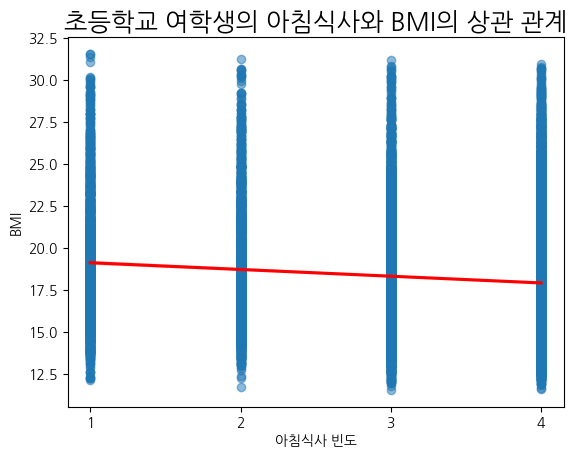

In [198]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_wel['아침식사'].corr(bmi_wel['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_wel, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('초등학교 여학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 강한 관계는 아닌 것으로 추정

상관계수: -0.08


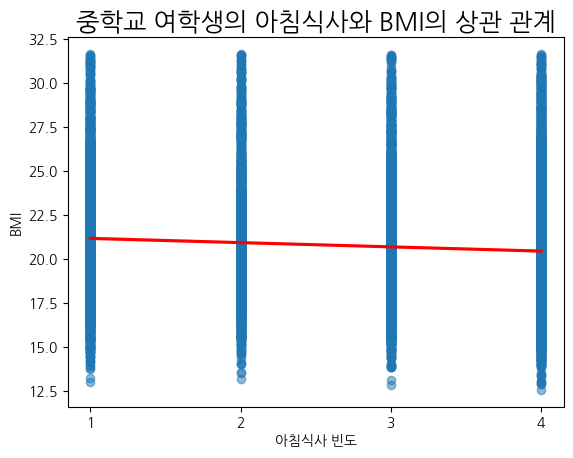

In [199]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_wmid['아침식사'].corr(bmi_wmid['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_wmid, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('중학교 여학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.05


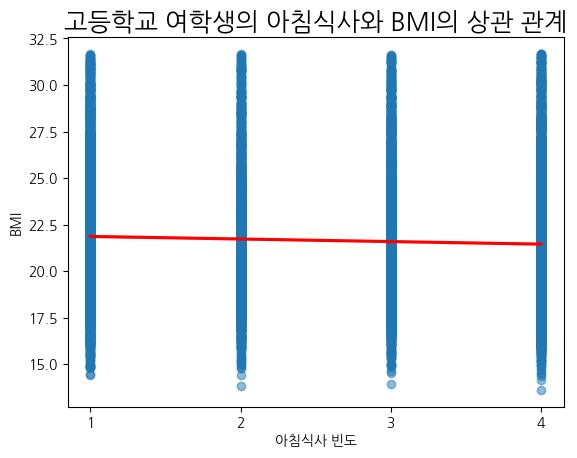

In [200]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_whigh['아침식사'].corr(bmi_whigh['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_whigh, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('고등학교 여학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.09


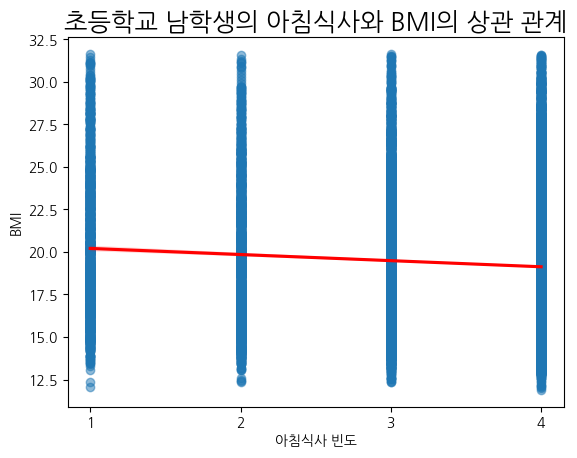

In [201]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_mel['아침식사'].corr(bmi_mel['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_mel, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('초등학교 남학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.05


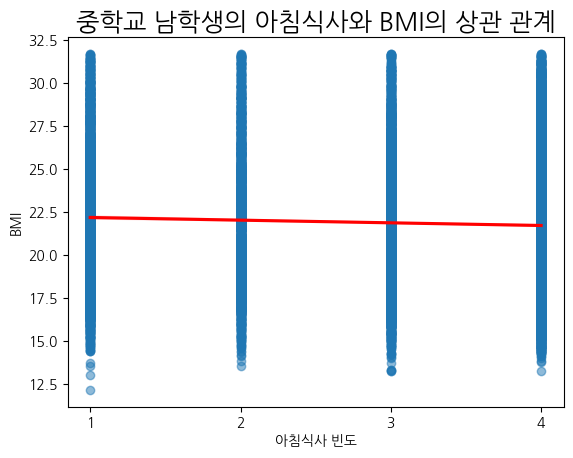

In [202]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_mmid['아침식사'].corr(bmi_mmid['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_mmid, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('중학교 남학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.01


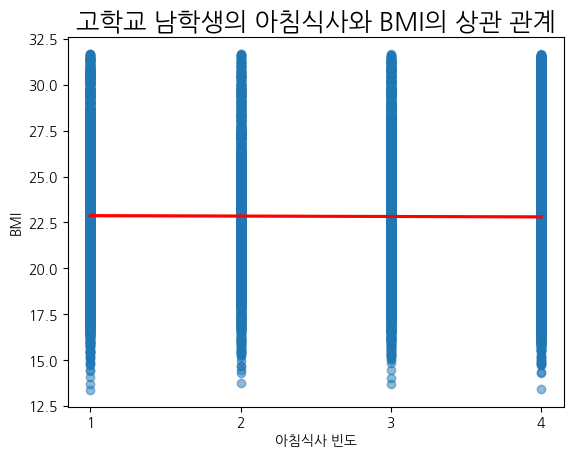

In [203]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_mhigh['아침식사'].corr(bmi_mhigh['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_mhigh, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('고학교 남학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 없는 것으로 추정